<a href="https://colab.research.google.com/github/EjbejaranosAI/AI_trends_2023/blob/main/Exploring_Mosi_Bench_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring multimodal Datasets

## Install requirements

In [14]:
!pip install -r requirements.txt

In [3]:
!git clone https://github.com/pliang279/MultiBench.git
%cd MultiBench

Cloning into 'MultiBench'...
remote: Enumerating objects: 6925, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 6925 (delta 62), reused 123 (delta 60), pack-reused 6789
Receiving objects: 100% (6925/6925), 51.06 MiB | 21.13 MiB/s, done.
Resolving deltas: 100% (4248/4248), done.
/content/MultiBench/MultiBench


In [4]:
!mkdir data

## Import libraries

In [30]:
import torch
import sys
import os
import pickle
import matplotlib.pyplot as plt
# Import the associated dataloader for affect datasets, which MOSI is a part of.
from datasets.affect.get_data import get_dataloader

In [8]:
filepath = "/content/MultiBench/data/mosi_raw.pkl"

with open(filepath, "rb") as f:
  alldata = pickle.load(f)

In [17]:
alldata.keys()


dict_keys(['train', 'valid', 'test'])

In [54]:
# Exploring modalities
train_content = alldata['train']
print(train_content.keys())

dict_keys(['vision', 'audio', 'text', 'labels', 'id'])


### Exploring vision modality

Number of elements in vision: 1283
Type of vision data: <class 'numpy.ndarray'>
Shape vision sample: (50, 35)
Vision Modality:
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.21094017 -1.44855344 -0.66897565 ...  2.23324013 -4.43007994
  -2.50674653]
 [-0.64783025 -2.99550366 -0.01241697 ...  5.45110846 -4.26082802
  -3.30961347]
 [-0.89712173 -4.91622925 -0.14667834 ...  4.64643097 -3.59820294
  -2.74900961]]


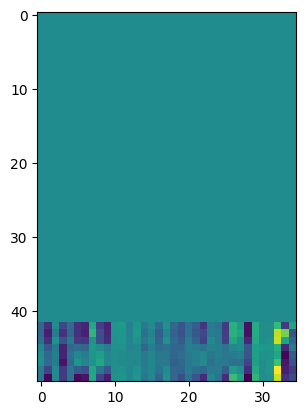

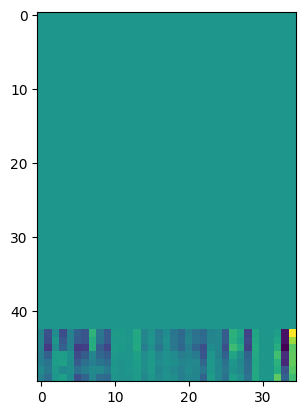

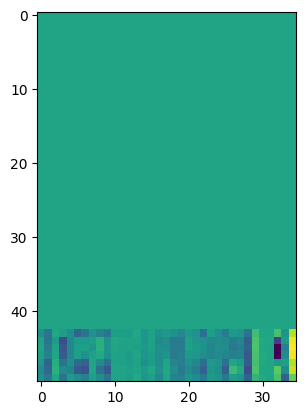

In [59]:
vision_modality = train_content['vision']
print(f"Number of elements in vision: {len(vision_modality)}")
print(f"Type of vision data: {type(vision_modality)}")
sample_vision = vision_modality[0]
print(f"Shape vision sample: {sample_vision.shape}")
print(f"Vision Modality:\n {sample_vision}")

for i in range(3):
  vision_image = vision_modality[i]

  plt.imshow(vision_image)
  plt.show()


#### Understanding pickle formats

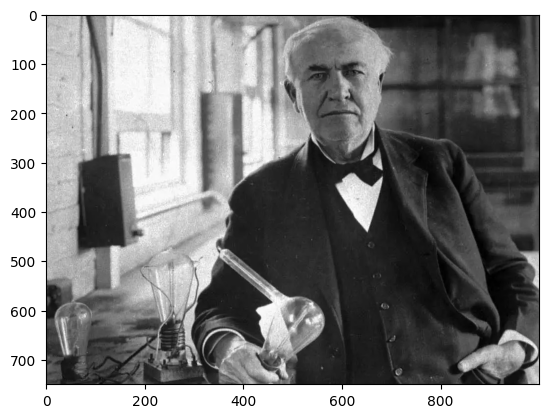

In [35]:
import cv2
path_simple_image = "/content/image.jpg"

img = cv2.imread(path_simple_image)
plt.imshow(img)
plt.show()


In [51]:
vision_sample_dict = {'image':img}
print(vision_sample_dict)

with open('/content/vision_file.pkl', 'wb') as f:  # open a text file
    pickle.dump(vision_sample_dict, f) # serialize the list

{'image': array([[[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 49,  49,  49],
        [ 54,  54,  54],
        [ 57,  57,  57]],

       [[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 58,  58,  58],
        [ 63,  63,  63],
        [ 66,  66,  66]],

       [[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 69,  69,  69],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       ...,

       [[ 85,  85,  85],
        [ 68,  68,  68],
        [ 72,  72,  72],
        ...,
        [229, 229, 229],
        [236, 236, 236],
        [229, 229, 229]],

       [[ 83,  83,  83],
        [ 66,  66,  66],
        [ 72,  72,  72],
        ...,
        [227, 227, 227],
        [227, 227, 227],
        [215, 215, 215]],

       [[ 79,  79,  79],
        [ 64,  64,  64],
        [ 72,  72,  72],
        ...,
        [212, 212, 212],
        [212, 212, 212],
        [200, 

In [52]:
with open('vision_file.pkl', 'rb') as f:

    vision_loaded = pickle.load(f) # deserialize using load()
    print(vision_loaded) # print student names

{'image': array([[[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 49,  49,  49],
        [ 54,  54,  54],
        [ 57,  57,  57]],

       [[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 58,  58,  58],
        [ 63,  63,  63],
        [ 66,  66,  66]],

       [[199, 199, 199],
        [184, 184, 184],
        [178, 178, 178],
        ...,
        [ 69,  69,  69],
        [ 75,  75,  75],
        [ 78,  78,  78]],

       ...,

       [[ 85,  85,  85],
        [ 68,  68,  68],
        [ 72,  72,  72],
        ...,
        [229, 229, 229],
        [236, 236, 236],
        [229, 229, 229]],

       [[ 83,  83,  83],
        [ 66,  66,  66],
        [ 72,  72,  72],
        ...,
        [227, 227, 227],
        [227, 227, 227],
        [215, 215, 215]],

       [[ 79,  79,  79],
        [ 64,  64,  64],
        [ 72,  72,  72],
        ...,
        [212, 212, 212],
        [212, 212, 212],
        [200, 

### Exploring audio modality

Number of elements in audio: 1283
Type of audio data: <class 'numpy.ndarray'>
Length sample audio: (50, 74)
Audio Modality:
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.22000000e+02  6.66666687e-01  9.89001915e-02 ...  8.80259797e-02
   4.09209915e-02  1.33800760e-01]
 [ 2.13843750e+02  9.79166687e-01  1.60358369e-01 ... -1.16521502e-02
   6.68889210e-02  1.73782691e-01]
 [ 2.06714279e+02  7.61904776e-01  1.31449461e-01 ...  5.32066263e-02
   1.14056304e-01  2.07019895e-01]]


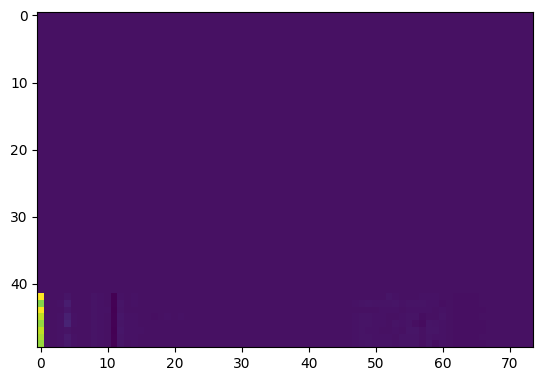

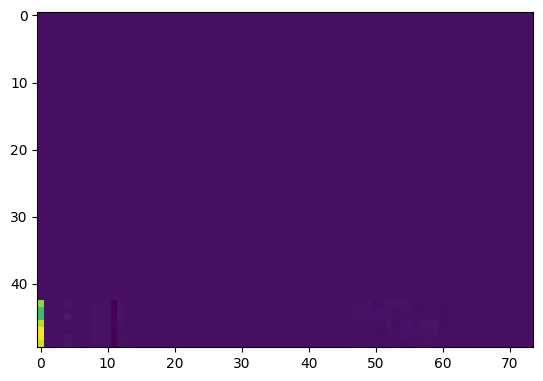

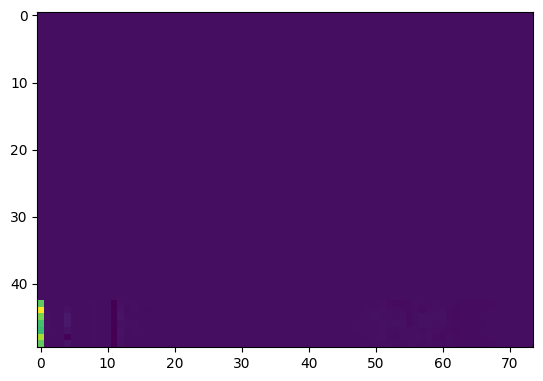

In [60]:
audio_modality = train_content['audio']
print(f"Number of elements in audio: {len(audio_modality)}")
print(f"Type of audio data: {type(audio_modality)}")
sample_audio = audio_modality[0]
print(f"Length sample audio: {sample_audio.shape}")
print(f"Audio Modality:\n {sample_audio}")

for i in range(3):
  sample_audio = audio_modality[i]
  plt.imshow(sample_audio)
  plt.show()


# Exploring text modality

In [73]:
text_modality = train_content['audio']
print(f"Number of elements in audio: {len(text_modality)}")
print(f"Type of audio data: {type(text_modality)}")
sample_text = text_modality[0][10]
print(f"Shape sample audio: {sample_text.shape}")
print(f"Text Modality:\n {text_modality}")


Number of elements in audio: 1283
Type of audio data: <class 'numpy.ndarray'>
Shape sample audio: (74,)
Text Modality:
 [[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [ 2.22000000e+02  6.66666687e-01  9.89001915e-02 ...  8.80259797e-02
    4.09209915e-02  1.33800760e-01]
  [ 2.13843750e+02  9.79166687e-01  1.60358369e-01 ... -1.16521502e-02
    6.68889210e-02  1.73782691e-01]
  [ 2.06714279e+02  7.61904776e-01  1.31449461e-01 ...  5.32066263e-02
    1.14056304e-01  2.07019895e-01]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+

In [74]:
import numpy as np
# Convert the array into text
array_text = np.array2string(sample_text, precision=8, separator=', ')

# Print the array in text format
print(array_text)


[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0.]


# Get dataset and split data

In [75]:
# Create the training, validation, and test-set dataloaders.
traindata, validdata, testdata = get_dataloader(
    "/content/MultiBench/data/mosi_raw.pkl", robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)


In [79]:
print(f"Train size: {len(traindata)}")
print(f"Validation size: {len(validdata)}")
print(f"Test size: {len(testdata)}")


Train size: 41
Validation size: 7
Test size: 22


## Import models

In [10]:
# Here, we'll import several common modules should you want to mess with this more.
from unimodals.common_models import GRU, MLP, Sequential, Identity

# As this example is meant to be simple and easy to train, we'll pass in identity
# functions for each of the modalities in MOSI:
encoders = [Identity().cuda(), Identity().cuda(), Identity().cuda()]

In [11]:
# Import a fusion paradigm, in this case early concatenation.
from fusions.common_fusions import ConcatEarly  # noqa

# Initialize the fusion module
fusion = ConcatEarly().cuda()

In [12]:
head = Sequential(GRU(409, 512, dropout=True, has_padding=False,
                  batch_first=True, last_only=True), MLP(512, 512, 1)).cuda()

In [15]:
# Standard supervised learning training loop
from training_structures.Supervised_Learning import train, test

# For more information regarding parameters for any system, feel free to check out the documentation
# at multibench.readthedocs.io!
train(encoders, fusion, head, traindata, validdata, 100, task="regression", optimtype=torch.optim.AdamW,
      is_packed=False, lr=1e-3, save='mosi_ef_r0.pt', weight_decay=0.01, objective=torch.nn.L1Loss())

print("Testing:")
model = torch.load('mosi_ef_r0.pt').cuda()
test(model, testdata, 'affect', is_packed=False,
     criterion=torch.nn.L1Loss(), task="posneg-classification", no_robust=True)


Epoch 0 train loss: tensor(1.3206, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 0 valid loss: 1.3821851015090942
Saving Best
Epoch 1 train loss: tensor(1.3250, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 1 valid loss: 1.3790830373764038
Saving Best
Epoch 2 train loss: tensor(1.3316, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 2 valid loss: 1.3899649381637573
Epoch 3 train loss: tensor(1.3186, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 3 valid loss: 1.3807276487350464
Epoch 4 train loss: tensor(1.3198, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 4 valid loss: 1.3878810405731201
Epoch 5 train loss: tensor(1.3204, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 5 valid loss: 1.379377841949463
Epoch 6 train loss: tensor(1.3195, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 6 valid loss: 1.3836599588394165
Epoch 7 train loss: tensor(1.3178, device='cuda:0', grad_fn=<DivBackward0>)
Epoch 7 valid loss: 1.3859021663665771
Epoch 8 train loss: tensor(1.3150, device='cuda:0', grad_